# Chapter 1 네트워크 구성요소

### 네트워크의 정의
상호 연결되거나 상호 관련된 체인, 그룹 또는 시스템
### 네트워크 G에는 두 요소가 있다.
1. N개의 노드[꼭지점]  
N: 네트워크의 크기(size)
2. L개의 링크[엣지, 노드 쌍들의 집합]: 링크(i,j) - 노드 i와 노드 j를 연결
### 네트워크의 종류
1. 방향성 네트워크: 방향성 링크(directed link), 가중치 링크(i,j,w) / 무향성 네트워크
2. 둘 이상의 노드 유형이 있는 네트워크 [예] 이분 네트워크(bipartite network)
3. 다중 네트워크(multiple network): 여러 유형의 링크가 있는 네트워크

anaconda prompt에서 pip install --upgrade networkx 로 설치

### 파이썬 NeworkX 모듈
NetworkX를 사용하여 가중치가 있거나 가중치가 없는 엣지로 구성된 무방향 또는 방향 그래프를 구성하고 그릴 수 있다.  
그래프를 분석하는 다양한 함수를 사용할 수 있다.

### Official documentation for version used in this tutorial

https://networkx.github.io/documentation/networkx-3.1/

### Official tutorial for version used in this tutorial

https://networkx.github.io/documentation/networkx-3.1/tutorial.html

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline      

In [41]:
nx.__version__

'2.6.3'

### 무향성 그래프(undirected graphs)를 생성하고 그리기

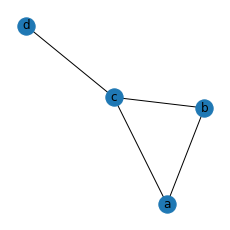

In [108]:
G = nx.Graph() # 그래프 객체를 만들어 G라는 이름을 붙인다.

G.add_node('a') # a라는 node를 생성한다.

# 한 번에 몇 개의 노드를 추가할 수 있다.
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# 노드 a와 노드 b를 연결하는 엣지를 추가할 수 있다.
# 무향성 그래프 -> 노드의 순서는 중요하지 않다.
G.add_edge('a', 'b') # a와 b를 연결하는 edge를 만든다

# 2-튜플의 형식으로 한 번에 여러 개의 엣지를 추가할 수 있다.
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# 그래프를 그린다.
plt.figure(figsize=(3,3)) 
nx.draw(G, with_labels=True) # 그림을 그리고, 레이블을 달아라
plt.show()

In [43]:
print('graph nodes: ', G.nodes())
print('graph edges: ', G.edges())

graph nodes:  ['a', 'b', 'c', 'd']
graph edges:  [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]


In [44]:
G.number_of_nodes()

4

In [45]:
G.number_of_edges()

4

In [46]:
print('<The edges of this graph>') # for 문을 사용해 엣지를 따로 출력
for u, v in G.edges:
    print(u, v)

<The edges of this graph>
a b
a c
b c
c d


In [47]:
print('<The edges of this graph>')
for edge in G.edges:
    print(edge)

<The edges of this graph>
('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [48]:
for node in G.nodes:
    print('The neighbors of node %s :' % node)
    for neighbor in G.neighbors(node):
        print(neighbor, '\t')
    print()

The neighbors of node a :
b 	
c 	

The neighbors of node b :
a 	
c 	

The neighbors of node c :
a 	
b 	
d 	

The neighbors of node d :
c 	



In [49]:
for node in G.nodes:
    print('The neighbors of node %s :' % node, list(G.neighbors(node)))

The neighbors of node a : ['b', 'c']
The neighbors of node b : ['a', 'c']
The neighbors of node c : ['a', 'b', 'd']
The neighbors of node d : ['c']


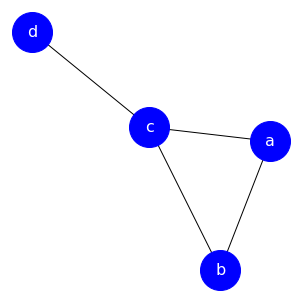

In [50]:
plt.figure(figsize=(4,4)) 
nx.draw(G, with_labels=True,
        node_color='blue',  node_size=1600,
        font_color='white', font_size=16,
        )
plt.show()

# NetworkX 함수 vs. Graph 메소드

    G.<method_name>(<arguments>)

    nx.<function_name>(G, <arguments>)

In [51]:
nx.is_tree(G) # G라는 그래프가 tree인가? G는 그냥 graph니까 tree가 아니다.

False

In [52]:
nx.is_connected(G) # G라는 그래프가 노드 간에 연결되어 있는 그래프인가?

True

### 노드(node)와 엣지(edge)가 있는지 확인하려면

그래프에 노드가 있는지 확인하려면, has_node() 메소드를 사용한다.

In [53]:
G.has_node('a') # G라는 그래프에 a 노드가 있는가?

True

In [54]:
G.has_node('x')

False

In [55]:
'd' in G.nodes # G의 노드 중에 d가 있는가?

True

In [56]:
G.has_edge('a', 'b') # G에 a와 b를 연결하는 edge가 있는가?

True

In [57]:
G.has_edge('a', 'd') 

False

In [58]:
('c', 'd') in G.edges

True

### Node degree
특정 노드에 몇 개의 엣지가 연결되어 있는지 확인한다.

In [59]:
len(list(G.neighbors('c'))) # count : list에 특정 글자가 몇 개 있는지 셀 때 사용

3

In [60]:
for node in G.nodes:
    print('The degree of node %s :' % node, len(list(G.neighbors(node))))

The degree of node a : 2
The degree of node b : 2
The degree of node c : 3
The degree of node d : 1


In [61]:
G.degree('d')

1

In [62]:
for node in G.nodes:
    print('The degree of node %s :' % node, G.degree(node))

The degree of node a : 2
The degree of node b : 2
The degree of node c : 3
The degree of node d : 1


### 방향성 그래프(directed graphs)를 생성하고 그리기

edge에 방향이 존재한다

In [63]:
D = nx.DiGraph()
D.add_edge(1, 2)
D.add_edge(2, 1) # 방향이 있으니 (1,2)와 (2,1)은 다르다
D.add_edges_from([(2, 3), (3, 4), (4, 2)])

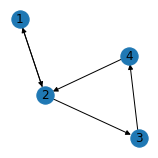

In [64]:
plt.figure(figsize=(2,2)) 
nx.draw(D, with_labels=True)
plt.show()

In [65]:
D.number_of_nodes()

4

In [66]:
D.number_of_edges()

5

In [67]:
for node in D.nodes:
    print('The neighbors of node %s :' % node, list(D.neighbors(node)))

The neighbors of node 1 : [2]
The neighbors of node 2 : [1, 3]
The neighbors of node 3 : [4]
The neighbors of node 4 : [2]


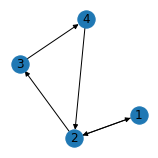

In [68]:
plt.figure(figsize=(2,2)) 
nx.draw(D, with_labels=True)
plt.show()

In [69]:
for node in D.nodes:
    print('The predecessors of node %s :' % node, list(D.predecessors(node)))

The predecessors of node 1 : [2]
The predecessors of node 2 : [1, 4]
The predecessors of node 3 : [2]
The predecessors of node 4 : [3]


In [70]:
for node in D.nodes:
    print('The successors of node %s :' % node, list(D.successors(node)))

The successors of node 1 : [2]
The successors of node 2 : [1, 3]
The successors of node 3 : [4]
The successors of node 4 : [2]


### 다양한 유형의 네트워크를 생성할 수 있다.

#### 완전 네트워크(complete network)
가능한 모든 노드 쌍이 링크로 연결된 최대 링크 수를 갖는 네트워크
#### 완전 이분 네트워크(complete bipartite network)

그래프는 첫 번째에서 노드 0부터 노드 3(=4-1)까지, 두 번째에서 노드 4에서 노드 8(4+5-1)까지 두 개의 파티션으로 구성된다.  
첫 번째 파티션의 각 노드는 두 번째 파티션의 각 노드에 연결된다.

In [71]:
B = nx.complete_bipartite_graph(4, 5) # 파티션 2개로 구성된 network

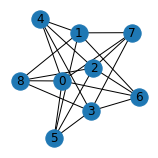

In [72]:
plt.figure(figsize=(2,2)) 
nx.draw(B, with_labels=True)
plt.show()

#### 사이클(cycle)
원천 노드(source node)와 목표 노드(target node) 간의 특별한 경로

In [73]:
C = nx.cycle_graph(4) # 노드 4개를 갖는 cycle

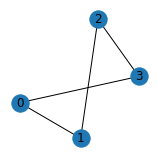

In [74]:
plt.figure(figsize=(2,2)) 
nx.draw(C, with_labels=True)
plt.show()

#### 경로(path)

In [75]:
P = nx.path_graph(5)

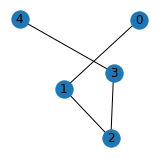

In [76]:
plt.figure(figsize=(2,2)) 
nx.draw(P, with_labels=True)
plt.show()

#### 별 모양 네트워크(star network)

In [77]:
S = nx.star_graph(6)

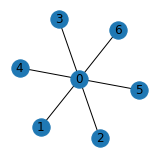

In [78]:
plt.figure(figsize=(2,2)) 
nx.draw(S, with_labels=True)
plt.show()